## EDA Extensivo

In [1]:
import sys, os
sys.path.append(os.getcwd().replace('/notebooks',''))  # Replace with current directory name

In [2]:
from utils.data import Datasets
from utils.eda import column_explore

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = Datasets()

## cash

In [4]:
ds.cash[ds.cash['cash_request_id']==2122]

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
13,2122,100.0,money_back,2020-05-22 12:47:42.741369+00:00,2020-06-13 06:36:34.188372+00:00,8218.0,2020-05-23 14:29:15.376466+00:00,NaN,2020-06-15 22:00:00+00:00,2020-05-27,2020-06-13 06:36:34.188042+00:00,regular,NaT,NaN,NaT,NaT,8218


In [5]:
ds.cash[ds.cash['cash_request_id']==23004]

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
8815,23004,100.0,transaction_declined,2020-10-22 09:49:41.938320+00:00,2020-10-22 09:54:57.157714+00:00,83479.0,NaT,NaN,2020-11-01 23:51:00+00:00,NaT,NaT,instant,2020-10-22 09:54:21.304205+00:00,NaN,NaT,NaT,83479


In [6]:
ds.cash[ds.cash['cash_request_id']==21897]
ds.fees[ds.fees['cash_request_id']==21897].sort_values(by='created_at')

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1615,14481,21897,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 21897,2020-10-18 08:22:10.900090+00:00,2020-10-18 08:22:10.900113+00:00,2020-11-30 19:49:32.588919+00:00,NaT,NaT,after
11,15434,21897,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-21 09:00:21.619473+00:00,2020-10-21 09:00:21.619504+00:00,2020-10-21 09:00:25.398771+00:00,2020-10-26 22:00:00+00:00,2020-10-30 23:00:00+00:00,before
8008,19693,21897,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-29 11:38:58.852097+00:00,2020-10-29 11:38:58.852166+00:00,2020-10-29 11:39:02.482594+00:00,2020-10-30 23:00:00+00:00,2020-11-29 23:00:00+00:00,before


In [7]:
# Check for missing values in the DataFrame
missing_values = pd.isnull(ds.cash)
# Count missing values in each column
missing_counts = missing_values.sum()
print('Missing Values in Each Column:')
print(missing_counts)

Missing Values in Each Column:
cash_request_id                   0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
id_usuario                        0
dtype: int64


In [8]:
column_explore(ds.cash['amount']) # CONCLUSIÓN: La mayoría de préstamos son de 100€, seguidos por los de 50€ y luego ya otros valores

- - - - - Begin EDA of feature 'amount' - - - - - - - - - - - - - - - - - - 
TOTAL NUMBER OF ROWS:  23970
NUMBER OF UNIQUE VALUES: 41
NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: 0.17%
PERCENTAGE OF NAN VALUES IS: 0.0%
COLUMN DATA TYPE:  float64
COLUMN UNIQUE VALUES: 
 [100.  99.  90.   1.  70.  25.  50.  20.  60.  80.  30.  10.  40. 150.
  98. 200.  85.  65.  95.  31.  75.  72.  22.  67.  94.  45.  55.  35.
  97.  28.  86.   8.  15.  39.   2.  11.  49.   5.  36.  54.  24.]
VARIABLE WEIGHT WITHIN THE TOTAL OF THE COLUMN: 
 amount
100.0    67.14
50.0     22.13
25.0      5.32
80.0      1.11
60.0      0.79
70.0      0.63
20.0      0.55
30.0      0.48
40.0      0.42
90.0      0.38
10.0      0.24
200.0     0.10
95.0      0.09
1.0       0.08
75.0      0.08
45.0      0.06
55.0      0.06
65.0      0.05
99.0      0.05
15.0      0.04
85.0      0.04
35.0      0.04
5.0       0.03
2.0       0.01
98.0      0.01
28.0      0.01
22.0      0.01
11.0      0.01
49.0      0.00
36.0      0.00
54.0      

In [9]:
ds.cash.status.value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [10]:
ds.cash.transfer_type.value_counts()

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64

In [11]:
ds.cash.recovery_status.value_counts()

recovery_status
completed               2468
pending                  845
pending_direct_debit      16
cancelled                  1
Name: count, dtype: int64

In [12]:
column_explore(ds.cash['money_back_date'])

- - - - - Begin EDA of feature 'money_back_date' - - - - - - - - - - - - - - - - - - 
TOTAL NUMBER OF ROWS:  23970
NUMBER OF UNIQUE VALUES: 12221
NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: 50.98%
PERCENTAGE OF NAN VALUES IS: 30.98%
COLUMN DATA TYPE:  datetime64[ns, UTC]
COLUMN UNIQUE VALUES: 
 <DatetimeArray>
[                             'NaT', '2020-07-06 03:36:03.023521+00:00',
 '2020-06-03 05:11:35.312616+00:00', '2020-06-13 06:36:34.188042+00:00',
 '2020-06-10 08:20:10.398977+00:00', '2020-11-06 07:16:21.845479+00:00',
 '2020-04-14 20:25:28.747087+00:00', '2020-03-31 20:00:52.443628+00:00',
 '2020-09-18 07:45:25.740402+00:00', '2020-06-27 03:28:09.137532+00:00',
 ...
 '2021-02-05 21:25:44.230776+00:00', '2021-02-05 20:28:11.583499+00:00',
 '2021-02-06 20:16:09.463799+00:00', '2021-02-05 20:48:23.237207+00:00',
 '2021-02-05 12:04:06.144421+00:00', '2021-02-05 12:11:58.131036+00:00',
 '2021-02-06 20:17:49.257521+00:00', '2020-12-01 13:26:53.787672+00:00',
 '2021-02-05 12:19:30

In [13]:
ds.cash[(ds.cash['money_back_date'].notnull()) & (ds.cash['status']!='money_back')].loc[:, ['amount','status','money_back_date']]

,amount,status,money_back_date
286,100.0,direct_debit_rejected,2020-07-02 18:47:17.295625+00:00
753,100.0,direct_debit_rejected,2020-06-15 21:48:36.150666+00:00
935,100.0,direct_debit_rejected,2020-06-11 22:37:50.972072+00:00
1005,100.0,direct_debit_rejected,2020-06-04 09:49:52.217008+00:00
1070,100.0,direct_debit_rejected,2020-06-04 11:16:55.805646+00:00
...,...,...,...
23916,50.0,direct_debit_rejected,2020-12-09 23:00:00+00:00
23931,100.0,active,2020-11-23 23:00:00+00:00
23932,100.0,direct_debit_rejected,2021-02-02 23:00:00+00:00
23934,100.0,active,2020-07-07 15:51:37+00:00


In [14]:
# CONCLUSIÓN: Tal y como se describe en el Excel Lexique:
# 'money_back_date': Date where the CR was considered as money back. It's either the paid_by_card date 
#   or the date were we considered that's the direc debit have low odds to be rejected (based on business rules) 

## fees

In [15]:
ds.cash[~ds.cash['cash_request_id'].isin(ds.fees['cash_request_id'].values)].shape # 11037 entradas en tabla cash NO tienen su correspondiente en la tabla fees, basándonos en 'cash_request_id'

(11037, 17)

In [16]:
ds.fees[~ds.fees['cash_request_id'].isin(ds.cash['cash_request_id'].values)].shape # 4 entradas en tabla fees NO tienen su correspondiente en la tabla cash
ds.fees[~ds.fees['cash_request_id'].isin(ds.cash['cash_request_id'].values)].head()
ds.cash[ds.cash['cash_request_id'].isin([11164, 11444, 11788, 12212])] # Confirmado, esas 4 entradas (para las que hemos repoblado 'cash_request_id') no están en la tabla cash

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario


In [17]:
# Hay 7 transacciones con una fee tipo 'instant_payment' que sin embargo constan como peticiones de tipo 'regular' en la tabla cash_request
ds.fees.type.value_counts()
ds.cash[ds.cash['cash_request_id'].isin(ds.fees[ds.fees['type']=='instant_payment']['cash_request_id'])]['transfer_type'].value_counts()

transfer_type
instant    11075
regular        7
Name: count, dtype: int64

In [18]:
ds.fees.status.value_counts()

status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64

In [19]:
ds.fees.category.value_counts()

category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64

In [20]:
ds.fees[['cash_request_id','type','status','category','reason','charge_moment']].sample(50)

,cash_request_id,type,status,category,reason,charge_moment
12424,12538,instant_payment,accepted,NaN,Instant Payment Cash Request 12538,after
10075,19845,instant_payment,accepted,NaN,Instant Payment Cash Request 19845,after
6174,16175,postpone,accepted,NaN,Postpone Cash Request 16175,before
8819,2347,incident,accepted,rejected_direct_debit,rejected direct debit,after
10802,15973,incident,accepted,rejected_direct_debit,rejected direct debit,after
1930,6271,postpone,accepted,NaN,Postpone Cash Request 6271,before
3216,13485,postpone,accepted,NaN,Postpone Cash Request 13485,before
4558,19611,postpone,cancelled,NaN,Postpone Cash Request 19611,before
617,22718,instant_payment,accepted,NaN,Instant Payment Cash Request 22718,after
19490,2793,incident,accepted,rejected_direct_debit,rejected direct debit,after


In [21]:
# Check for missing values in the DataFrame
missing_values = pd.isnull(ds.fees)
# Count missing values in each column
missing_counts = missing_values.sum()
print('Missing Values in Each Column:')
print(missing_counts)

Missing Values in Each Column:
id                     0
cash_request_id        0
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64


In [22]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

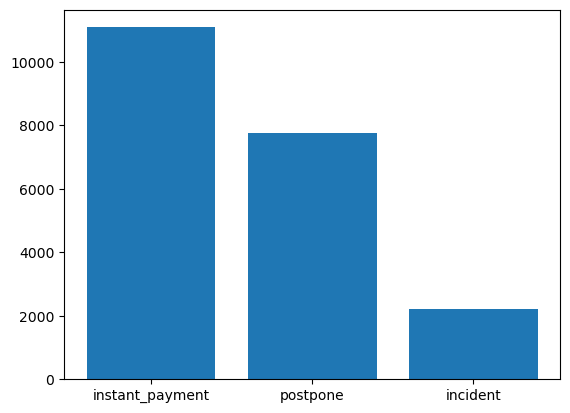

<Figure size 1500x1500 with 0 Axes>

In [23]:
print_bar_plot(ds.fees.type.value_counts().index, ds.fees.type.value_counts())


Text(0.5, 0.98, 'Características categóricas del DataFrame fees')

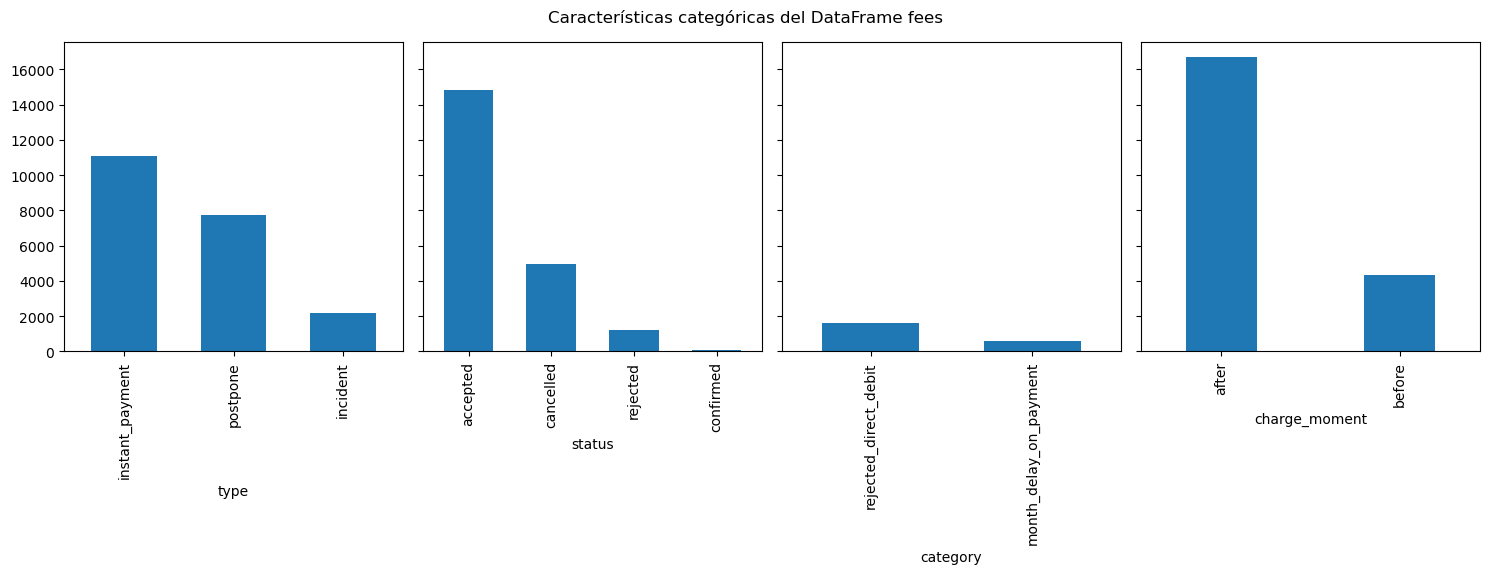

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
ds.fees.type.value_counts().plot(kind='bar', ax=axs[0], width=0.6)
ds.fees.status.value_counts().plot(kind='bar', ax=axs[1], width=0.6)
ds.fees.category.value_counts().plot(kind='bar', ax=axs[2], width=0.6)
ds.fees.charge_moment.value_counts().plot(kind='bar', ax=axs[3], width=0.4)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #rect=[left, bottom, right, top]
fig.suptitle('Características categóricas del DataFrame fees')


## Merged DataFrame

In [25]:
ds.merge_tables()
ds.merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32098 entries, 0 to 32097
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             32094 non-null  float64            
 1   amount                      32094 non-null  float64            
 2   status                      32094 non-null  object             
 3   created_at                  32094 non-null  datetime64[ns, UTC]
 4   updated_at                  32094 non-null  datetime64[ns, UTC]
 5   user_id                     29522 non-null  float64            
 6   moderated_at                21759 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2573 non-null   float64            
 8   reimbursement_date          32094 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  24149 non-null  datetime64[ns]     
 10  money_back_date             23917 non-null  datetime64[ns,

In [37]:
ds.merged[['cash_request_id','fee_id','fee_cash_request_id']].sample(5)

,cash_request_id,fee_id,fee_cash_request_id
18364,15791.0,7386.0,15791.0
714,787.0,NaN,NaN
29246,24149.0,NaN,NaN
30971,25828.0,19397.0,25828.0
17457,15105.0,10067.0,15105.0
